<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab13/CNNgalaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd /content/drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [25]:
!pwd

/content/drive/My Drive/dsps


In [26]:
!ls ../

 00101.mov
 00102.mov
 00103.mov
 00104.mov
 11bov.pdf
'11fe summary.gdoc'
 11img-179017.png
'1 2017 Proposal Award Information Form & Guidelines.pdf'
 2003VS2.png
 2013Jul15_obslog_0327.log
 2018-07-17_SC.pdf
'2018 Capstone assignments FINAL.XLSX'
'2018 Capstone assignments - worksheets.xlsx'
'2018 Capstone assignments - worksheets.xlsx.gsheet'
'2 2017 Final Report and Financial Attestation Forms.pdf'
'3 2017 Financial Report Template.xlsx'
'4 Form W-9.pdf'
 5.25.pdf
 8:00.gdoc
 A1DBA84B-27E0-4B23-A409-135AA52FB3FD.png
'AAS12948 referee report.gdoc'
'aas 2011 austin costs.gsheet'
'AAS check list.gsheet'
'AAS - EDU cheatsheet.pdf'
'aas membership.gsheet'
'AAS Poster Quaoar.jpg'
 abdulqaATudel.edu.png
'Abundance_Maryam_29_Aug13 (1).pro.gdoc'
 Abundance_Maryam_29_Aug13.pro
 Abundance_Maryam_29_Aug13.pro.gdoc
'A  Cadence  to  Reduce  Aliasing  in  LSST Bell.gdoc'
 accelnet
'AC NSF ID -000747680 -Bianco Federica.docx'
 Acquaviva.gdoc
'added coauthors.gsheet'
'A Diversity and Inclusion Comm

In [0]:
import json
import os
envs = json.load(open("../kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [9]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

all_ones_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
all_zeros_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
central_pixel_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
images_training_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
images_test_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
training_solutions_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip images_training_rev1.zip

Archive:  images_training_rev1.zip


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-051d82cd34f8>", line 1, in <module>
    get_ipython().system('unzip images_training_rev1.zip')
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_shell.py", line 96, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 438, in _system_compat
    shell.var_expand(cmd, depth=2), clear_streamed_output=False)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 195, in _run_command
    return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 222, in _monitor_process
    result = _poll_p

KeyboardInterrupt: ignored

In [8]:
!ls images_training_rev1

100008.jpg  206514.jpg	314574.jpg  417103.jpg	524343.jpg  628828.jpg
100023.jpg  206518.jpg	314587.jpg  417105.jpg	524347.jpg  628829.jpg
100053.jpg  206523.jpg	314596.jpg  417130.jpg	524354.jpg  628832.jpg
100078.jpg  206537.jpg	314597.jpg  417168.jpg	524361.jpg  628838.jpg
100090.jpg  206541.jpg	314622.jpg  417171.jpg	524365.jpg  628846.jpg
100122.jpg  206545.jpg	314634.jpg  417182.jpg	524366.jpg  628848.jpg
100123.jpg  206567.jpg	314642.jpg  417208.jpg	524379.jpg  628862.jpg
100128.jpg  206579.jpg	314656.jpg  417213.jpg	524393.jpg  628867.jpg
100134.jpg  206586.jpg	314669.jpg  417242.jpg	524419.jpg  628923.jpg
100143.jpg  206599.jpg	314694.jpg  417276.jpg	524423.jpg  628929.jpg
100150.jpg  206614.jpg	314700.jpg  417277.jpg	524428.jpg  628954.jpg
100157.jpg  206624.jpg	314701.jpg  417299.jpg	524468.jpg  628965.jpg
100187.jpg  206642.jpg	314705.jpg  417368.jpg	524495.jpg  628974.jpg
100204.jpg  206647.jpg	314724.jpg  417381.jpg	524497.jpg  628978.jpg
100237.jpg  206660.jpg	314751.jpg 

In [12]:
!unzip training_solutions_rev1.zip

Archive:  training_solutions_rev1.zip
replace training_solutions_rev1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import pandas as pd
training_labels = pd.read_csv("training_solutions_rev1.csv")

In [0]:
import pylab as pl
import cv2
import numpy as np

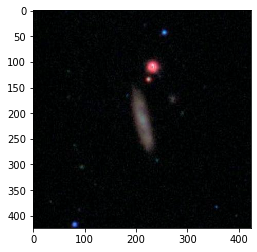

In [30]:
img = np.asarray(cv2.imread("images_training_rev1/313205.jpg"))
pl.imshow(img);

In [31]:
import glob
ims = np.zeros([1000, img.shape[0], img.shape[1], img.shape[2]], dtype=np.uint8)
for i,im in enumerate(glob.glob("images_training_rev1/*")[:1000]):
  if i%10 == 0:
    print ("index", i, end="\r", flush=True)
  ims[i] = np.asarray( cv2.imread(im))


In [13]:
ims.shape

(1000, 424, 424, 3)

In [14]:
training_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


# I am going to modify the current 18 probabilistic labels to obtain 4 labels that classify galaxies as :
#  spiral, 
# elliptical
# irregular
# not-a-galaxy

In [0]:
nga = training_labels["Class1.3"]
spi = training_labels[["Class5.1", "Class5.2", "Class5.3", "Class5.4"]].max(axis=1)
ell = training_labels["Class6.2"]
irr = training_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].max(axis=1)
training_labels2 = pd.DataFrame({"nga": nga, "spi":spi, "ell":ell, "irr":irr})

In [16]:
training_labels2

,nga,spi,ell,irr
0,0.000000,0.512101,0.945547,0.027226
1,0.009222,0.236781,0.810851,0.140353
2,0.056931,0.117790,1.000000,0.000000
3,0.068059,0.125280,0.679602,0.128159
4,0.066161,0.000000,0.970617,0.029383
...,...,...,...,...
61573,0.000000,0.260804,0.754266,0.175454
61574,0.000000,0.053406,0.872356,0.062095
61575,0.019783,0.347328,0.160814,0.604214
61576,0.000000,0.545764,0.136000,0.500256


In [0]:
newclass = [np.where(training_labels2.iloc[i] == np.max(training_labels2.iloc[i]))[0][0] for i in range(len(training_labels2))]

In [18]:
newclass

[2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,


# split a 1000 galaxies dataset into train-test with a proportion of 2-1. Note that 1000 object is a critically small dataset for DNN!

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ims, np.array(newclass[:1000]), test_size=0.33, random_state=42)

In [20]:
X_train.shape

(670, 424, 424, 3)

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


In [0]:
x_train.shape

In [0]:
batch_size = 128
num_classes = 4
epochs = 5
input_shape = ims[0].shape

In [0]:
import tensorflow as tf
from tensorflow import keras

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
from keras.optimizers import adam


# Set Optimizer
opt = adam(lr=0.001, decay=1e-6)

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [0]:
model.fit(X_train, ytrain, epochs=5)

Epoch 1/5



In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [0]:
score = model.evaluate(X_test, y_test)


In [0]:
score

In [32]:
from scipy import ndimage, misc
newimg = np.zeros([1000*5, img.shape[0], img.shape[1], img.shape[2]], 
                  dtype=np.uint8)
np.random.seed(123)
for i in range(len(ims)):
  angles = np.random.rand(4) *   180
  newimg[i*5] = ims[i].copy()
  for j,a in enumerate(angles):

    newimg[i*5+1+j] = ndimage.rotate(newimg[i*5], a, 
                                         reshape=False, mode='mirror')



KeyboardInterrupt: ignored

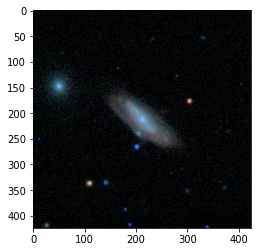

In [34]:
pl.imshow(ims[0])

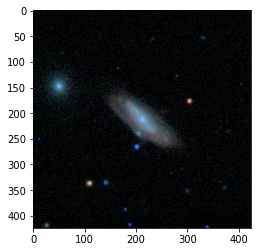

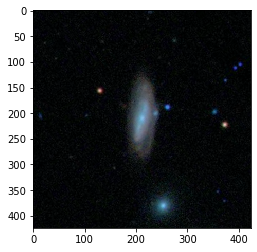

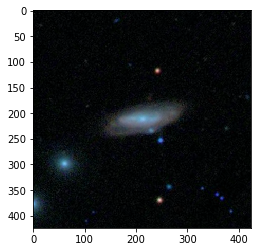

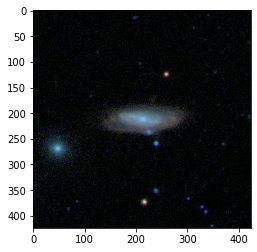

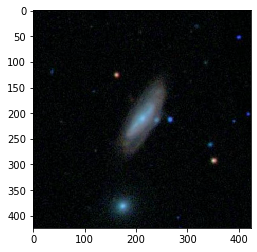

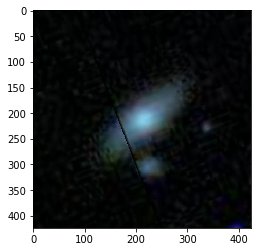

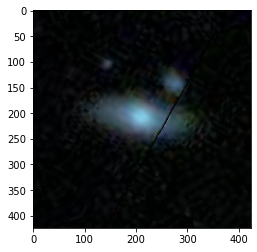

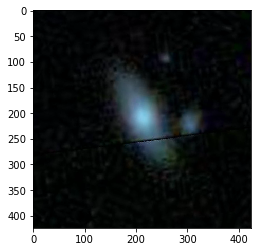

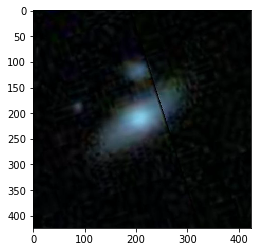

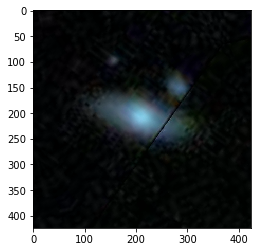

In [35]:

for i in range (10):
  pl.imshow(newimg[i])
  pl.show()

# Extra Creidt: 


in a look like the one above, take each image and rotate if by a random angle, **but also change its contrast by a random amount**. see the example below. choose small contrast changes if you want your images to remain realistic

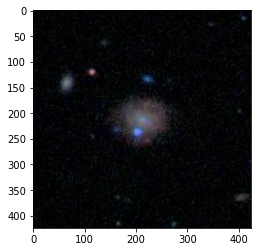

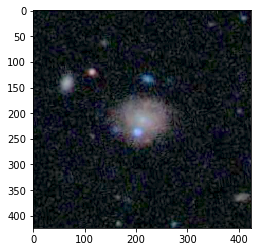

In [45]:
fig = pl.figure()
# a power < 1 (here 0.2) lowers the contrast
imgnew = ims[10].astype(float)**0.6

#normalize: reset range to 0-255
imgnew *= 255 / imgnew.max()
imgnew = imgnew.astype(np.uint8)

pl.imshow(ims[10])

fig = pl.figure()
pl.imshow(imgnew)

